In [ ]:
import librosa
from sympy import *
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftp
from scipy.fft import fft, fftfreq
import scipy.io.wavfile as wavfile

завдання 1

In [ ]:
  def generate_expansion(func, terms):
    """
    ...
    """
    x = symbols("x")
    init_printing(use_unicode=True)
    expression_terms = []
    for n in range(0, terms):
        final = diff(func, x, n).subs(x, 0) / factorial(n) * x**n
        expression_terms.append(final)
    return sum(expression_terms)

In [ ]:
def visualize_expression(original_func, func_1, func_2, func_3):
    """
    ...
    """
    x = sympify('x')
    expr1 = sympify(func_1)
    expr2 = sympify(func_2)
    expr3 = sympify(func_3)

    xi = [-2 + i * 0.04 for i in range(100)]
    y_1 = [expr1.evalf(subs={x: value}) for value in xi]
    y_2 = [expr2.evalf(subs={x: value}) for value in xi]
    y_3 = [expr3.evalf(subs={x: value}) for value in xi]
    plt.title("My function")
    plt.xlabel("x value")
    plt.ylabel(f"{original_func} value")
    plt.plot(xi, y_1, color='#34eb9e')
    plt.plot(xi, y_2, color='#4287f5')
    plt.plot(xi, y_3, color='#f54242')
    plt.show()

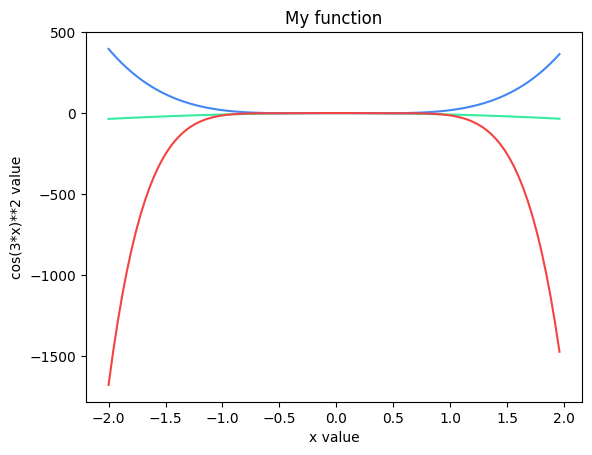

In [ ]:
func = "cos(3*x)**2"
terms_1 = 3
terms_2 = 5
terms_3 = 7

expr1 = generate_expansion(func, terms_1)
expr2 = generate_expansion(func, terms_2)
expr3 = generate_expansion(func, terms_3)
visualize_expression(func, expr1, expr2, expr3)

завдання 2

**Отже, завдання буде полягати у наступному:**

Спочатку у нас є даний звуковий файл.

Свій варіант можна знайти за домогою даного коду(PS: перша велика літера прізвище англійською мовою)

**Варіанти:**
0.  brahms
1.  choice
2.  fishin
3.  humpback
1.  nutcracker
2.  pistachio
1.  robin
2.  sweetwaltz
1.  trumpet
2.  vibeace












In [ ]:
var = ord('K') % 10
var

5

Наприклад, у мене 0 варіант, тому моє аудіо буде 'brahms'.

In [ ]:
audio_path = librosa.example('pistachio')
Audio(audio_path)

Для того, щоб побудувати нашу діаграму звукової хвилі, вартувало б знайти наш ряд та sampling_rate. Для цього необхідно використати вбудовану функцію бібліотеки librosa -  *load*.Детальніше можна почитати : [тут](https://librosa.org/doc/main/generated/librosa.load.html).

Також потрібно дізнатися час , щоб побудувати графік залежностей час(у секундах) - амплітуда звуку.  Амплітуду нашого звуку відображає наш звуковий ряд.

Приклад як шукати час можна знайти тут:

А далі потрібно ж глянути як трансформується наша хаотична хвиля за допомогою дискретного перетворення Фур'є 🐊

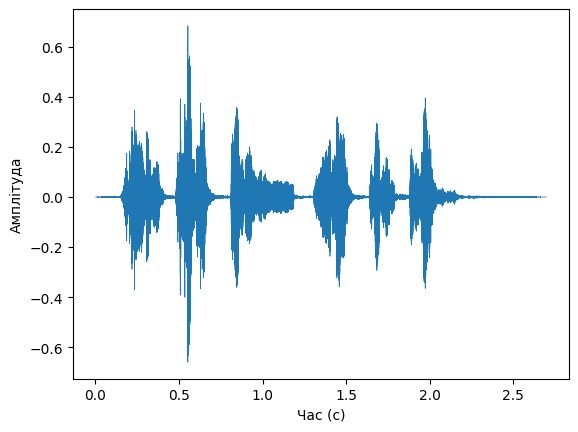

In [ ]:
pistachio_sample, s_rate = librosa.load(audio_path)
time = np.arange(len(pistachio_sample)) / s_rate
plt.plot(time, pistachio_sample, linewidth=0.5)
plt.xlabel('Час (с)')
plt.ylabel('Амплітуда')
plt.show()

In [ ]:
size = pistachio_sample.size
time = np.arange(size) / s_rate
dt = 1 / s_rate

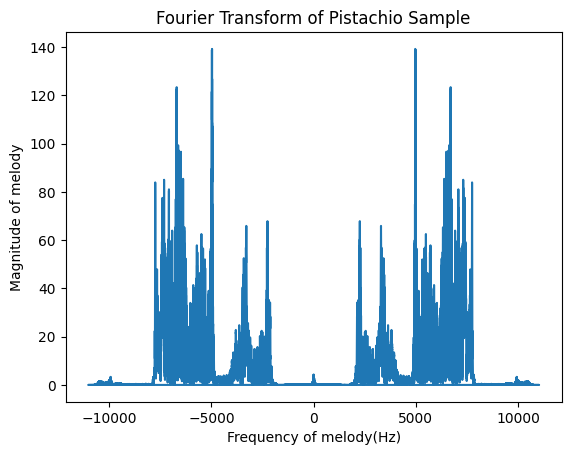

In [ ]:
fft = np.fft.fft(pistachio_sample)
freq = np.fft.fftfreq(len(fft), dt)
plt.plot(freq[:size//2], np.abs(fft[:size//2]))
plt.xlabel("Frequency of melody(Hz)")
plt.ylabel("Magnitude of melody")
plt.title("Fourier Transform of Pistachio Sample")
plt.show()

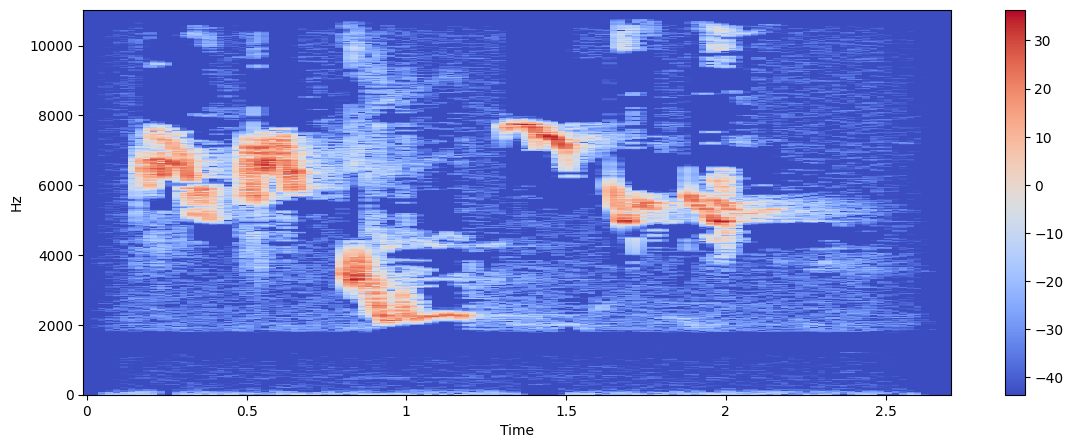

In [ ]:
X = librosa.stft(pistachio_sample)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=s_rate, x_axis='time', y_axis='hz')
plt.colorbar()

Висновок:
Чим більше наше число terms тим точніший наш графік